## Aplicação de Filtros Resposta Finita ao Impulso

Vamos iniciar lendo o arquivo com os dados do Eletrocardiograma que estão no arquivo ECG3.dat

O sinal de ECG foi amostrado com $F_s = 200 Hz$ mostrado na Figura abaixo.


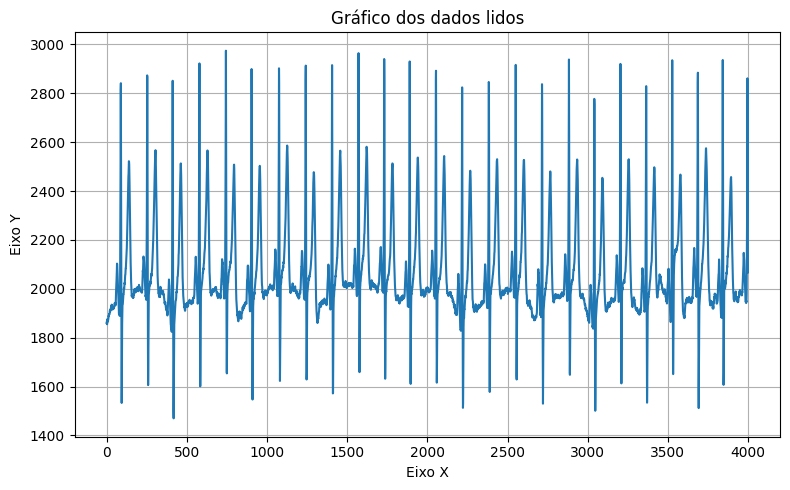

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Caminho para o arquivo .dat
caminho_arquivo = 'ECG3.dat'

# Lê os dados (assumindo que estão separados por espaços ou tabulações)
# Se houver cabeçalho, use skiprows=1
dados = np.loadtxt(caminho_arquivo)

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(dados, linestyle='-')
plt.title('Gráfico dos dados lidos')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.tight_layout()
plt.show()


Aplicando a FFT com $N = 512$ obtemos o espectro da figura abaixo, na qual observa-se um nível DC e as componentes do sinal.

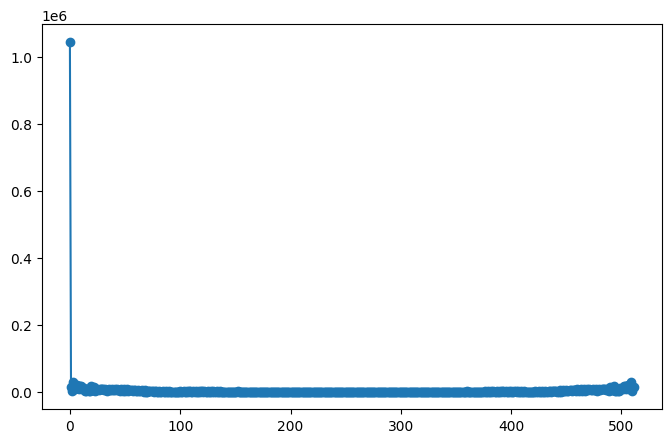

In [30]:
X_k = np.fft.fft(dados, 512)

plt.figure(figsize=(8, 5))
plt.plot(np.abs(X_k), marker='o', linestyle='-')

Se repetirmos o processo acima para um ECG ($F_s = 200Hz$, $N_{FFT} = 512$) contaminado com o sinal de 60Hz, obtemos os gráficos abaixo.

![title](img/ECGcomRuidoFFT.png)

Observando a Figura acima, vê-se um pico em $k = 154$, que corresponde a $k*F_s/N = 154*200/512 \approx 60\ Hz$.

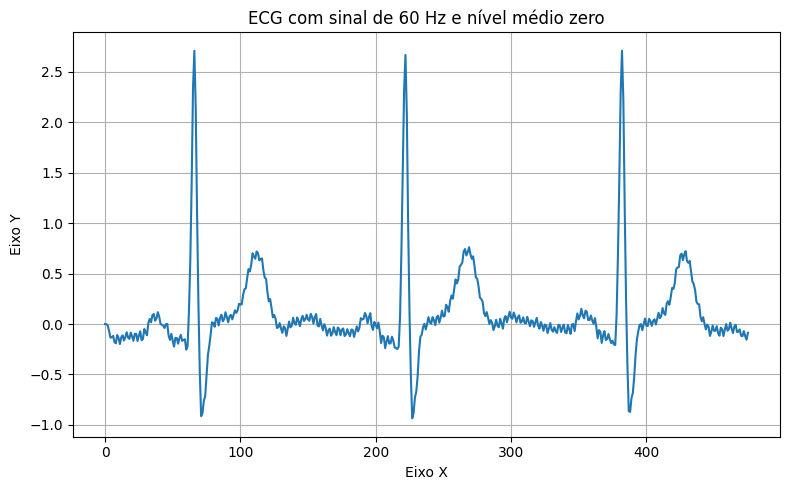

In [27]:
# Caminho para o arquivo .dat
caminho_arquivo = 'ecg_60hz_200.dat'

# Lê os dados (assumindo que estão separados por espaços ou tabulações)
# Se houver cabeçalho, use skiprows=1
dados_60Hz = np.loadtxt(caminho_arquivo)

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(dados_60Hz,  linestyle='-')
plt.title('ECG com sinal de 60 Hz e nível médio zero')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.tight_layout()
plt.show()

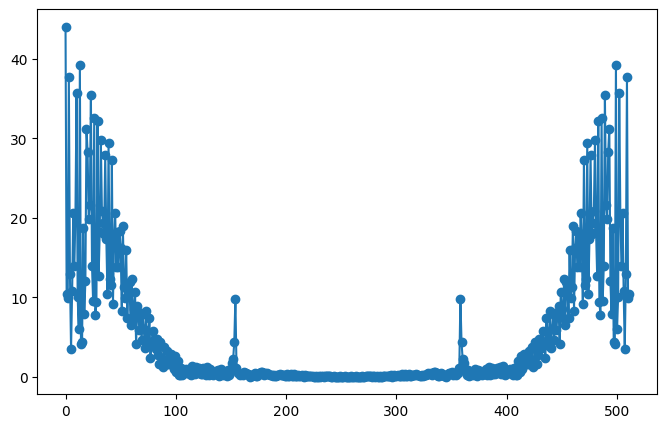

In [15]:
X_60Hz_k = np.fft.fft(dados_60Hz, 512)

plt.figure(figsize=(8, 5))
plt.plot(np.abs(X_60Hz_k), marker='o', linestyle='-')

### <font color='blue'> Filtro para retirar a interferência de $60\ Hz$ </color>


Vamos projetar um filtro FIR para retirar a interferência no sinal de ECG. Para tanto vamos considerar os seguintes parâmetros:

1. Filtro Refeita faixa;
2. Ripple na banda de passagem $1\ dB$;
2. Faixa de rejeição $58\ a \ 61\ Hz$;
3. Atenuação na banda de rejeição $60\ dB$

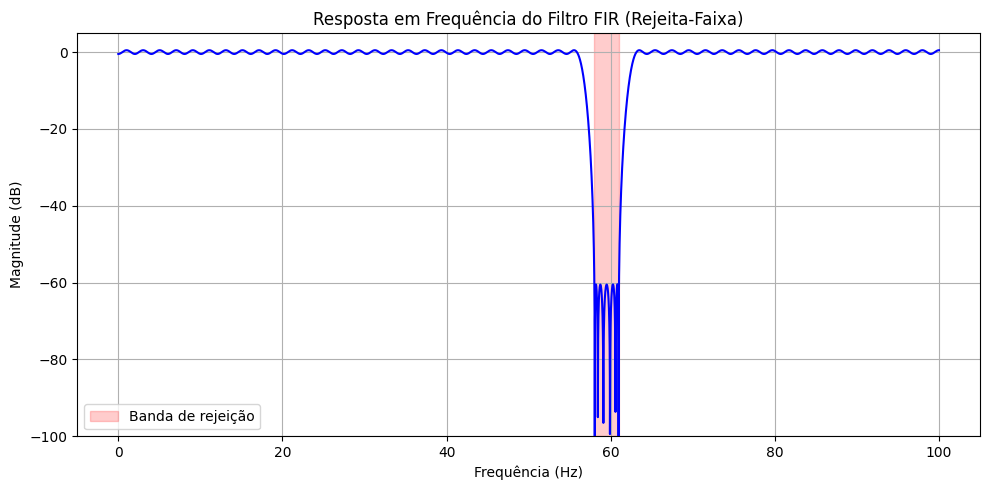

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz

# Frequência de amostragem (você pode ajustar conforme necessário)
fs = 200  # Hz

# Frequências normalizadas (0 a 1, onde 1 corresponde a fs/2)
nyq = fs / 2

# Faixas de frequência (em Hz)
# Vamos criar transições suaves em torno da banda de rejeição (fade-in e fade-out)
bands = [0, 56, 58, 61, 63, nyq]  # bordas das faixas (em Hz)
desired = [1, 0, 1]               # ganho desejado por faixa

# Convertendo para a escala normalizada (0 a 1)
bands = [f / nyq for f in bands]

# Pesos para ripple (menor peso na banda de rejeição para obter maior atenuação)
# Como a rejeição deve ser 60 dB e o ripple 1 dB, os pesos refletem isso
weights = [1, 60, 1]

# Ordem do filtro (quanto maior, melhor resolução em frequência)
numtaps = 201  # Número de coeficientes (ajustável)

# Projeto do filtro usando Remez
coeffs = remez(numtaps, bands, desired, weight=weights, fs=2)

# Visualização da resposta em frequência
w, h = freqz(coeffs, worN=8000, fs=fs)

plt.figure(figsize=(10, 5))
plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
plt.title('Resposta em Frequência do Filtro FIR (Rejeita-Faixa)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-100, 5)
plt.grid(True)
plt.axvspan(58, 61, color='red', alpha=0.2, label='Banda de rejeição')
plt.legend()
plt.tight_layout()
plt.show()

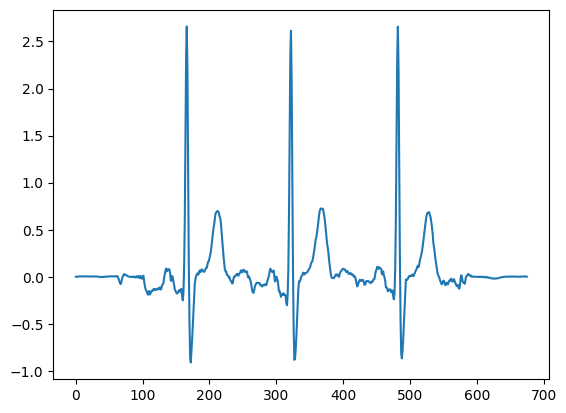

In [23]:
x_filtrado = np.convolve(dados_60Hz, coeffs)

plt.plot(x_filtrado)

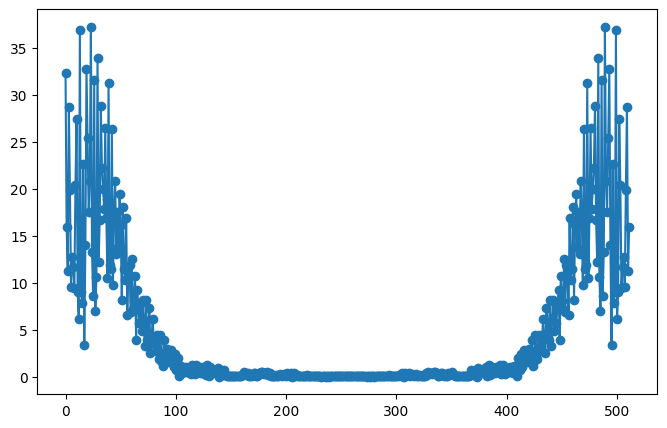

In [24]:
X_filtrado_60Hz_k = np.fft.fft(x_filtrado, 512)

plt.figure(figsize=(8, 5))
plt.plot(np.abs(X_filtrado_60Hz_k), marker='o', linestyle='-')